<a href="https://colab.research.google.com/github/jlazo3010/Entrega_trabajo_final/blob/main/Interpolacion_polinominal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
indicador_empleo = pd.read_csv('/content/drive/MyDrive/Analisis_numerico/Empleo_porcentaje.csv')
indicador_inflacion = pd.read_csv('/content/drive/MyDrive/Analisis_numerico/Inflacion_porcentaje.csv')
indicador_produccion = pd.read_csv('/content/drive/MyDrive/Analisis_numerico/ProduccionConstruccion.csv')

In [ ]:
#Limpieza de Na´s
indicador_empleo = indicador_empleo.dropna(axis=0, how='any')
indicador_inflacion = indicador_inflacion.dropna(axis=0, how='any')
indicador_produccion = indicador_produccion.dropna(axis=0, how='any')

In [ ]:
def inter_polinominal(df,grado):
  # Definimos las entradas
  x = np.arange(0,len(df.iloc[:,1])).reshape(-1,1)
  y = df.iloc[:,1] 
  pre_process = PolynomialFeatures(degree= grado) #elegimos el grado del polinomio
  X_poly = pre_process.fit_transform(x) #transformamos los datos de entrada
  pr_model = LinearRegression() #Comenzamos a generar el modelo
  pr_model.fit(X_poly, y) #entrenamos el modelo
  y_pred = pr_model.predict(X_poly) #usamos los datos transformados para predecir con el modelo
  plt.figure(figsize=(10,7))
  plt.scatter(x, y, c = "black") #Graficamos el modelo
  plt.plot(x, y_pred)  
  plt.ticklabel_format(style="plain", axis="y")

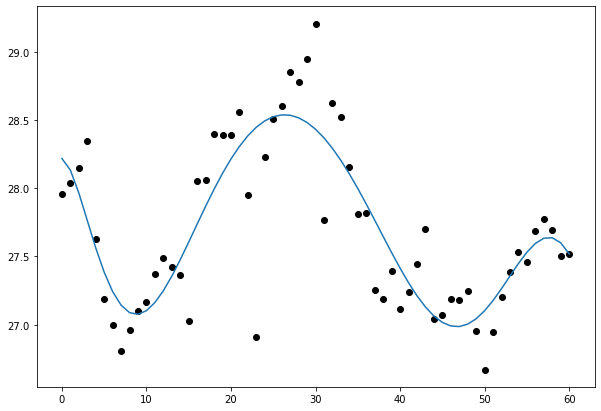

In [ ]:
inter_polinominal(indicador_empleo,9) #Grafica de indicador de empleo

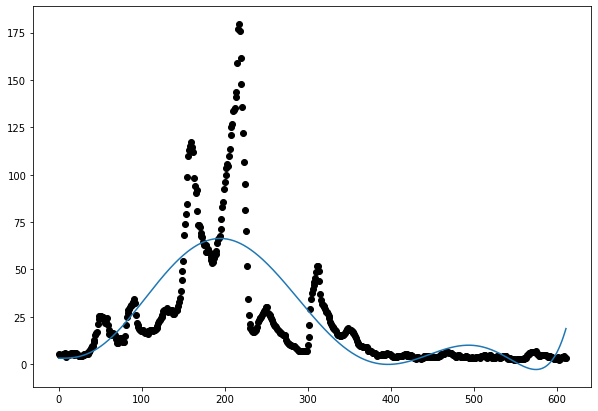

In [ ]:
inter_polinominal(indicador_inflacion,7)

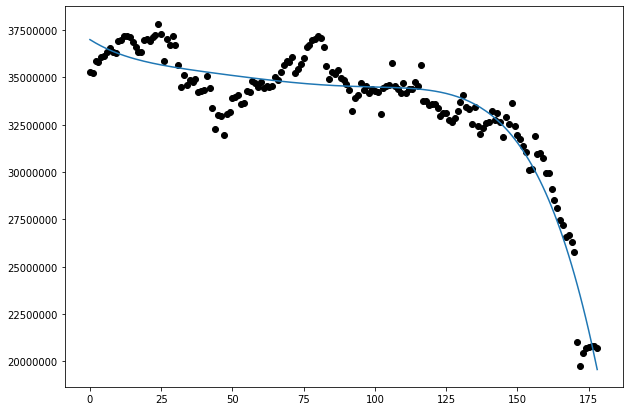

In [ ]:
inter_polinominal(indicador_produccion,5)

In [ ]:
def inter_polinominal_prediccion(df,grado):
  # Definimos las entradas
  x = np.arange(0,len(df.iloc[:,1])).reshape(-1,1)
  y = df.iloc[:,1] 
  x_pred = np.arange(0, len(df.iloc[:,1])+10).reshape(-1,1) #Estos datos predeciremos
  pre_process = PolynomialFeatures(degree= grado) #elegimos el grado del polinomio
  X_poly = pre_process.fit_transform(x) #transformamos los datos de entrada
  X_pred = pre_process.fit_transform(x_pred) #transformamos los datos para predecir
  pr_model = LinearRegression() #Comenzamos a generar el modelo
  pr_model.fit(X_poly, y) #entrenamos el modelo
  y_pred = pr_model.predict(X_pred) #usamos los datos transformados para predecir con el modelo
  plt.figure(figsize=(10,7)) #Graficamos el modelo
  plt.scatter(x, y, c = "black") #Graficamos el modelo
  plt.plot(x_pred, y_pred) 
  plt.legend(['Prediccion', 'Datos'], loc='best')
  plt.ticklabel_format(style="plain", axis="y")

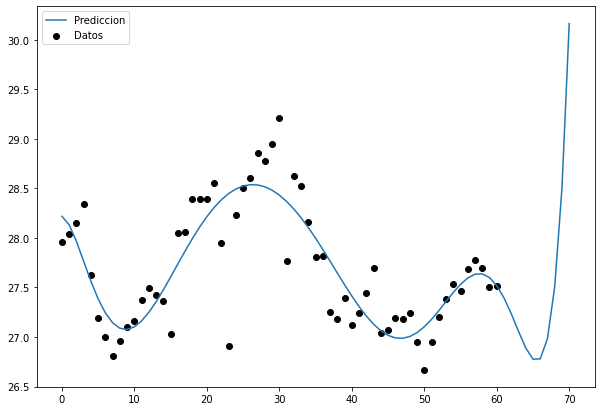

In [ ]:
inter_polinominal_prediccion(indicador_empleo,9) #Prediccion indicador de empleo

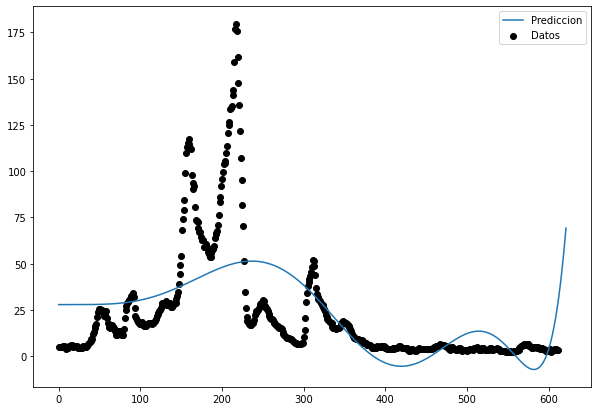

In [ ]:
inter_polinominal_prediccion(indicador_inflacion,9) #Prediccion indicador de inflacion

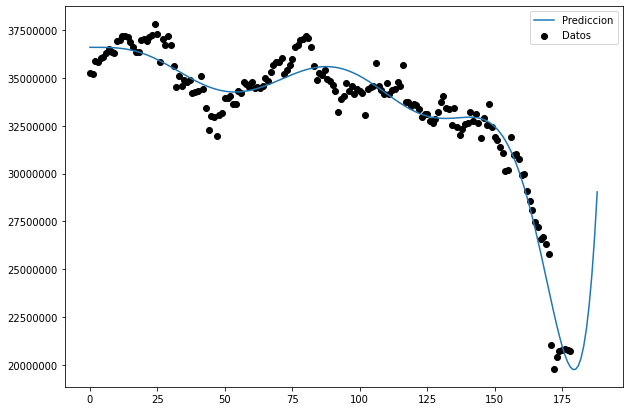

In [ ]:
inter_polinominal_prediccion(indicador_produccion,9) #Prediccion indicador de produccion